In [1]:
import pandas as pd
import numpy as np
from src import cleaning
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/loans_full_schema.csv')

In [3]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.shape

(10000, 55)

In [6]:
data.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [7]:
# copy of the original data
df = data.copy()

drop unnecessary columns

In [8]:
df = cleaning.drop_leakage_columns(df)

In [9]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,initial_listing_status,disbursement_method
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,whole,Cash
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,whole,Cash
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,fractional,Cash
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,whole,Cash
4,10.0,CA,RENT,35000.0,Verified,57.96,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,whole,Cash


Missing values in months_since_last_delinq and months_since_90d_late
- impute them with max + 1, 0 can be misinterpretted by the model. 

In [10]:
df = cleaning.fill_with_max(df, 'months_since_last_delinq')
df = cleaning.fill_with_max(df, 'months_since_90d_late')

Missing values in emp_length, debt_to_income
- impute them with median


In [11]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())
df['debt_to_income'] = df['debt_to_income'].fillna(df['debt_to_income'].median())

missing values in months_since_last_credit_inquiry and num_accounts_120d_past_due
- impute with max + 1

In [12]:
df = cleaning.fill_with_max(df, 'months_since_last_credit_inquiry')
df = cleaning.fill_with_max(df, 'num_accounts_120d_past_due')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        10000 non-null  float64
 1   state                             10000 non-null  object 
 2   homeownership                     10000 non-null  object 
 3   annual_income                     10000 non-null  float64
 4   verified_income                   10000 non-null  object 
 5   debt_to_income                    10000 non-null  float64
 6   delinq_2y                         10000 non-null  int64  
 7   months_since_last_delinq          10000 non-null  float64
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  int64  
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

In [14]:
df.shape

(10000, 45)

In [15]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,initial_listing_status,disbursement_method
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,whole,Cash
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,119.0,1996,1,30,14,28800,4321,0,1,129.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,whole,Cash
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,fractional,Cash
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,119.0,2007,0,4,4,25400,4997,0,1,129.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,whole,Cash
4,10.0,CA,RENT,35000.0,Verified,57.96,0,119.0,2008,7,22,16,69839,52722,0,0,129.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,whole,Cash


In [16]:
# save the current cleaned data into csv

df.to_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/cleaned_data_state_1.csv')

Check value counts for each column for any dicrepencies

In [17]:
for col in df.columns:
    print(df[col].value_counts())
    print()

emp_length
10.0    3332
6.0     1221
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
7.0      368
9.0      312
8.0      307
Name: count, dtype: int64

state
CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
DE      24
MT      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: count, dtype: int64

homeownership
MORTGAGE    4789
RENT        3858
OWN         1353
Name: count, dtype: int64

annual_income
60000.0     383
50000.0     350
65000.0     314
70000.0     273
75000.0     260
           ... 
43900.0       1
62800.0       1
74

In [18]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,initial_listing_status,disbursement_method
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,whole,Cash
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,119.0,1996,1,30,14,28800,4321,0,1,129.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,whole,Cash
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,fractional,Cash
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,119.0,2007,0,4,4,25400,4997,0,1,129.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,whole,Cash
4,10.0,CA,RENT,35000.0,Verified,57.96,0,119.0,2008,7,22,16,69839,52722,0,0,129.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,whole,Cash


In [19]:
# change_credit_line to years_since_first_credit

df['earliest_credit_line'] = pd.Timestamp.now().year - df['earliest_credit_line']


In [20]:
df.rename(columns={
    'earliest_credit_line': 'years_since_first_credit'
    }, inplace=True)

In [21]:
# dividing columns into 3 dataframes - (borrower_profile, credit_history, loan_details) and include target column in each for EDA

borrower_profile_df = df[['emp_length', 'state', 'homeownership', 'annual_income', 'verified_income', 'debt_to_income', 'interest_rate']]

credit_history_df = df[['delinq_2y', 'months_since_last_delinq', 'years_since_first_credit', 'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'months_since_90d_late', 'current_accounts_delinq', 'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'months_since_last_credit_inquiry', 'num_satisfactory_accounts', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt', 'interest_rate']]

loan_details_df = df[['loan_purpose', 'application_type', 'loan_amount', 'term', 'installment', 'grade', 'sub_grade', 'issue_month', 'initial_listing_status', 'disbursement_method','interest_rate']]

In [22]:
borrower_profile_df.shape[1] + credit_history_df.shape[1] + loan_details_df.shape[1]

47

## EDA - borrower's profile

In [23]:
temp_df = borrower_profile_df.copy()

In [24]:
temp_df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,interest_rate
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,14.07
1,10.0,HI,RENT,40000.0,Not Verified,5.04,12.61
2,3.0,WI,RENT,40000.0,Source Verified,21.15,17.09
3,1.0,PA,RENT,30000.0,Not Verified,10.16,6.72
4,10.0,CA,RENT,35000.0,Verified,57.96,14.07


Categorical Columns

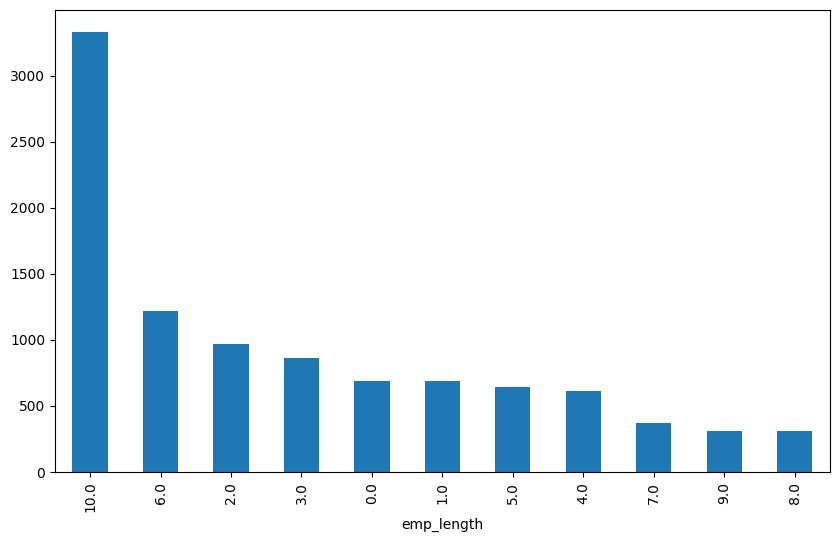

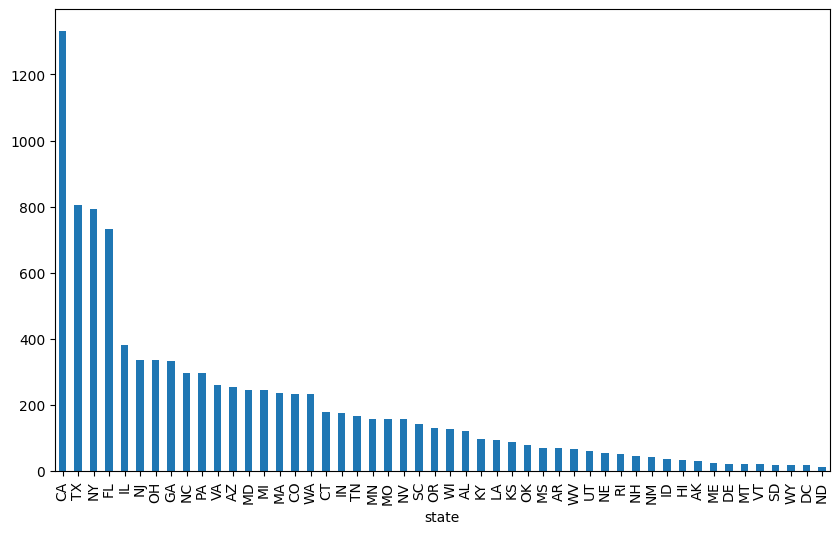

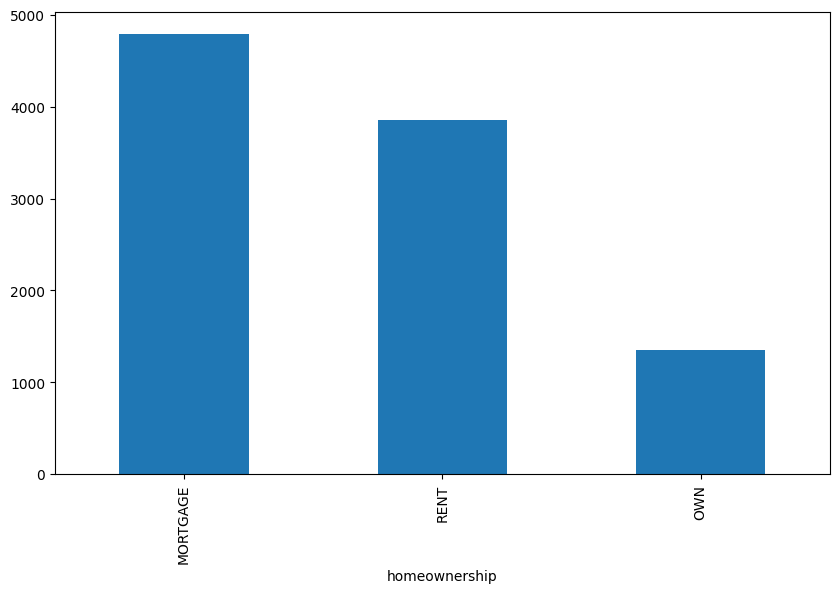

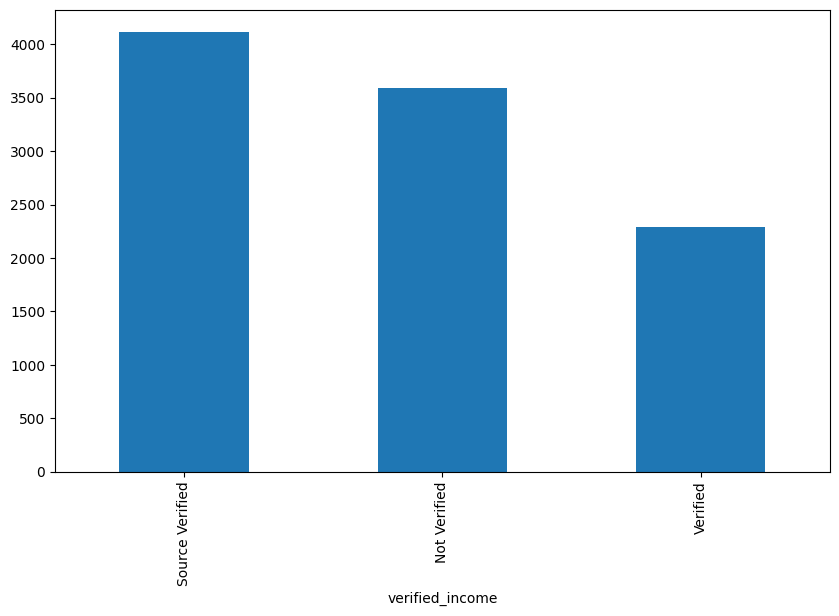

In [25]:
cat_cols = ['emp_length', 'state', 'homeownership', 'verified_income']

for col in cat_cols:
    plt.figure(figsize=(10,6))
    temp_df[col].value_counts().plot(kind='bar')
    plt.show()

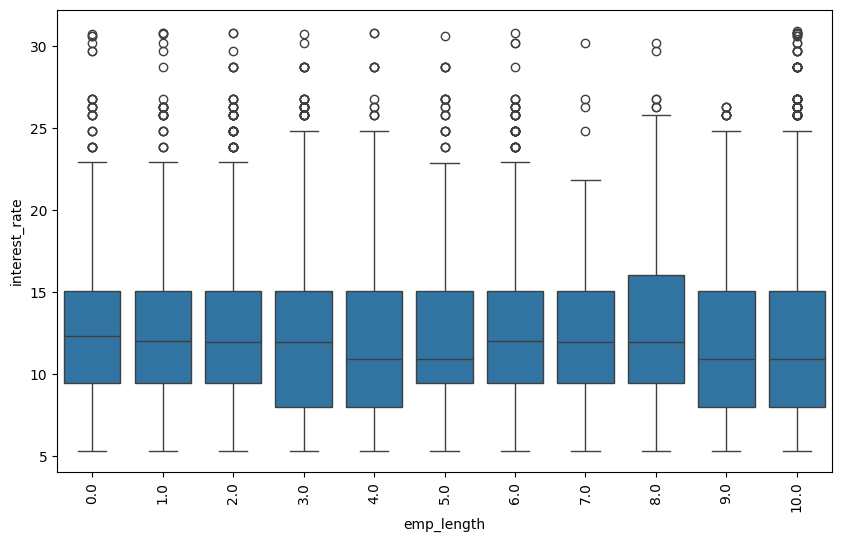

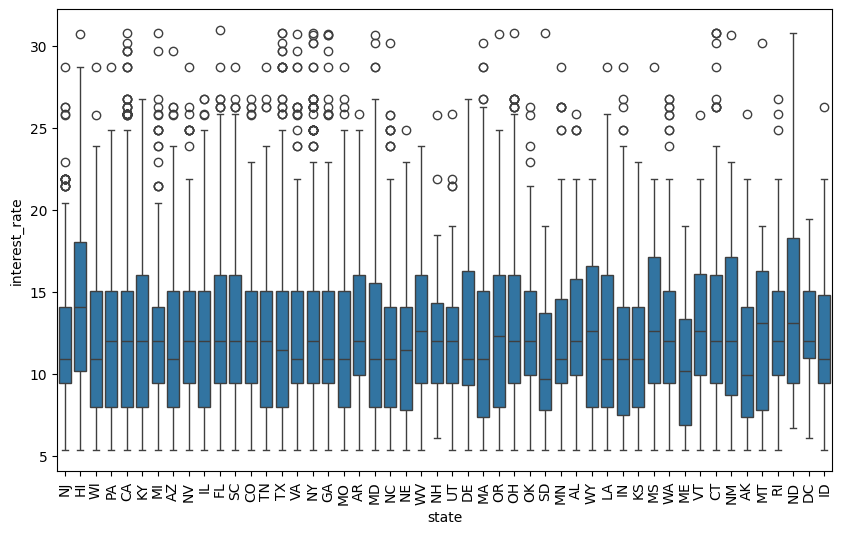

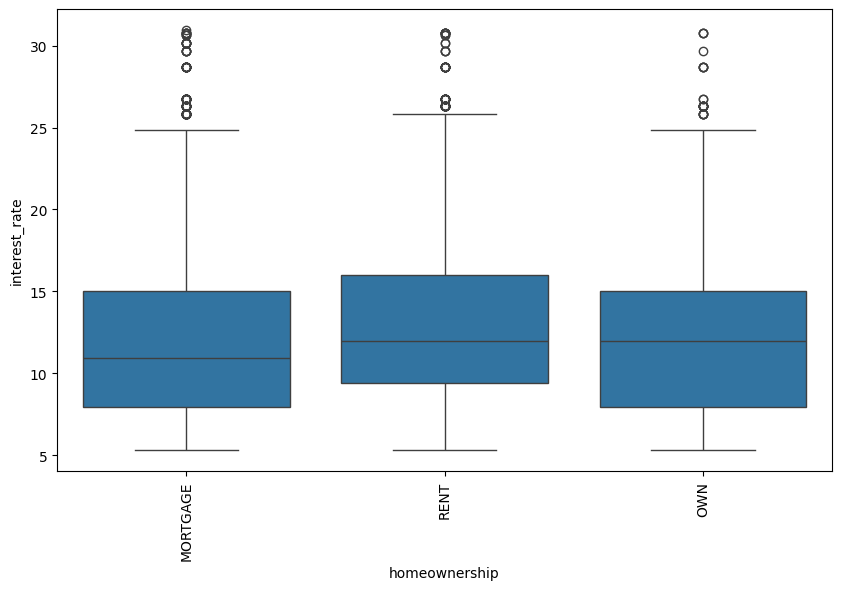

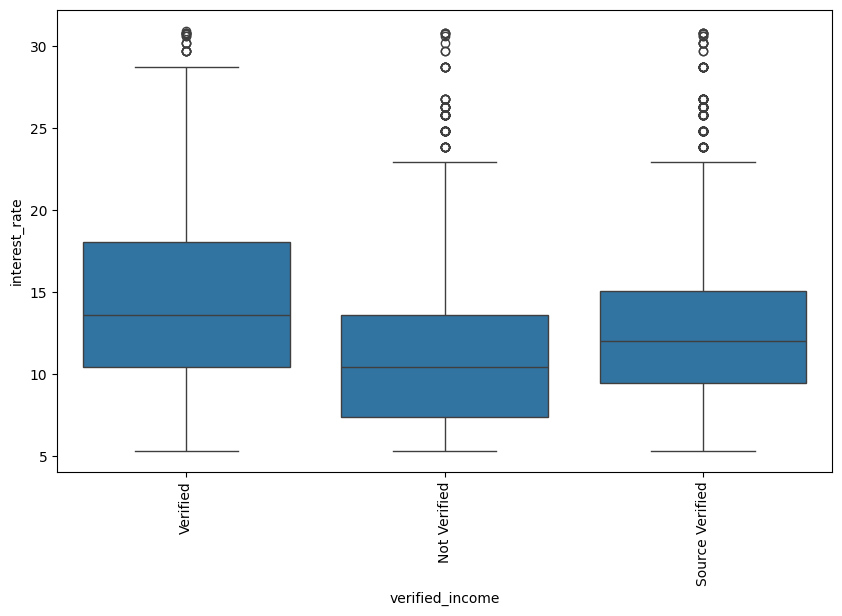

In [26]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data = temp_df, x= col, y = 'interest_rate')
    plt.xticks(rotation = 90)
    plt.show()

In [27]:
# since renters have slightly higher interest rates, therefore change the categories to is_renter or not

temp_df['is_renter'] = temp_df['homeownership'].replace({
    'RENT': 1,
    'OWN': 0,
    'MORTGAGE': 0
})

C:\Users\apaks\AppData\Local\Temp\ipykernel_20140\2655747276.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df['is_renter'] = temp_df['homeownership'].replace({


In [28]:
# high cardiniality in states column. less than 400 values counts of the states, group them to 'others'

state_counts = temp_df['state'].value_counts()
rare_states = state_counts[state_counts < 300].index
temp_df['state_grouped'] = temp_df['state'].replace(rare_states, 'other')

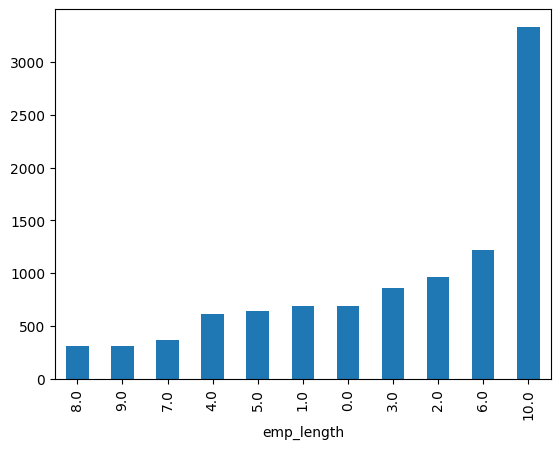

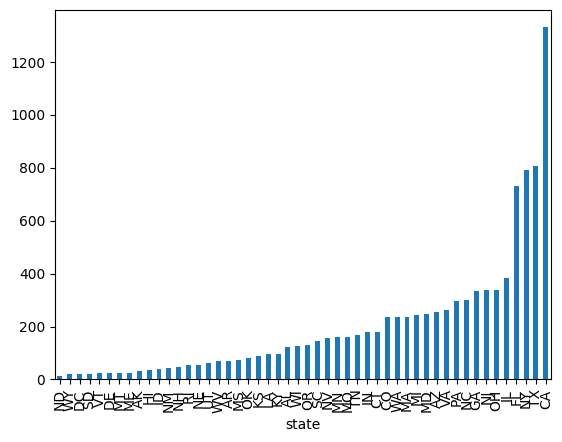

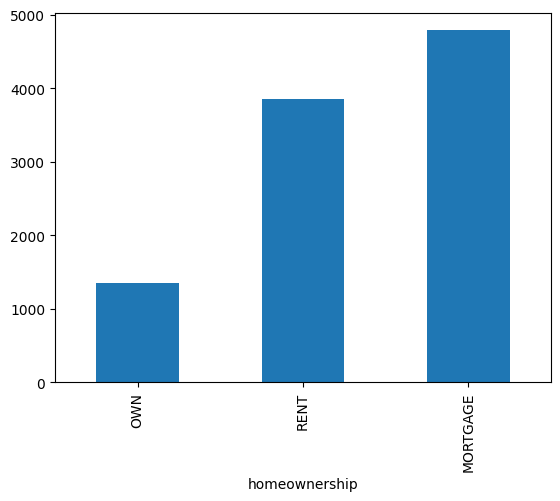

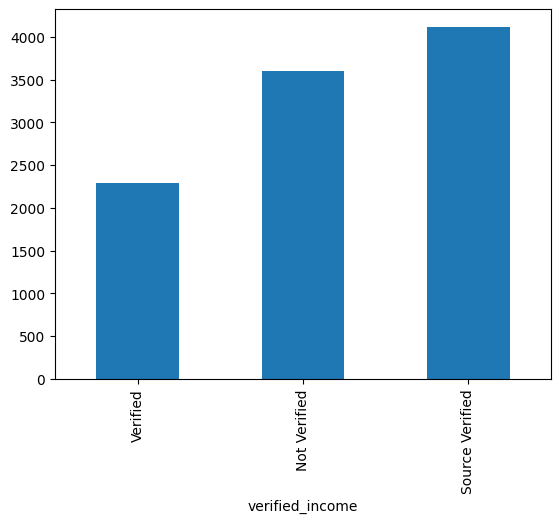

In [29]:
for col in cat_cols:
    temp_df[col].value_counts().sort_values().plot(kind= 'bar')
    plt.show()

Numerical Columns

<Axes: xlabel='annual_income', ylabel='Count'>

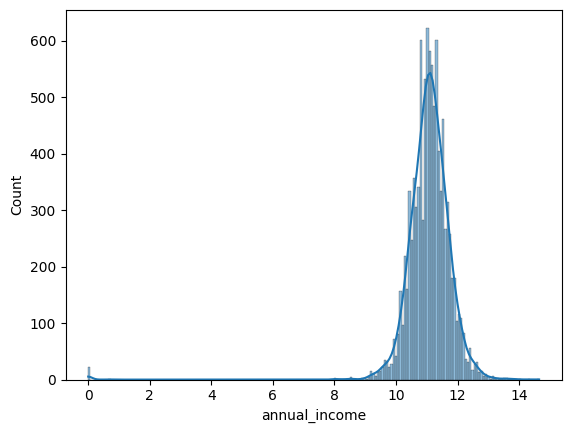

In [30]:
temp_df['log_transformed_annual_income'] = np.log1p(temp_df['annual_income'])
sns.histplot(np.log1p(temp_df['annual_income']), kde=True)



<Axes: xlabel='debt_to_income', ylabel='Count'>

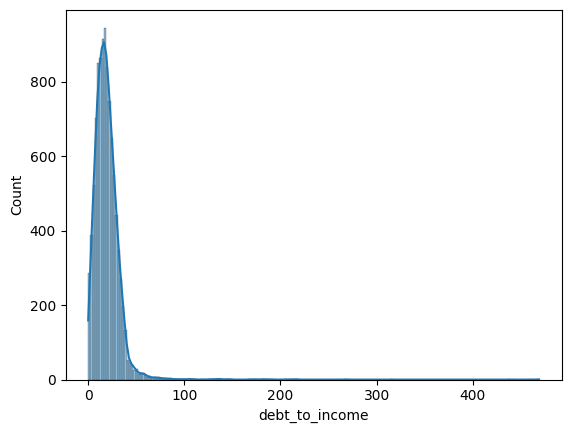

In [31]:
sns.histplot(data= temp_df, x = 'debt_to_income', kde=True)

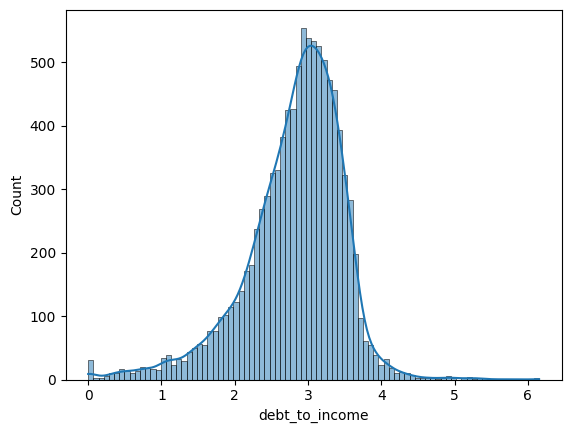

In [32]:
sns.histplot(np.log1p(temp_df['debt_to_income']), kde=True)
temp_df['log_transformed_debit_to_income'] = np.log1p(temp_df['debt_to_income'])

<Axes: xlabel='log_transformed_annual_income', ylabel='interest_rate'>

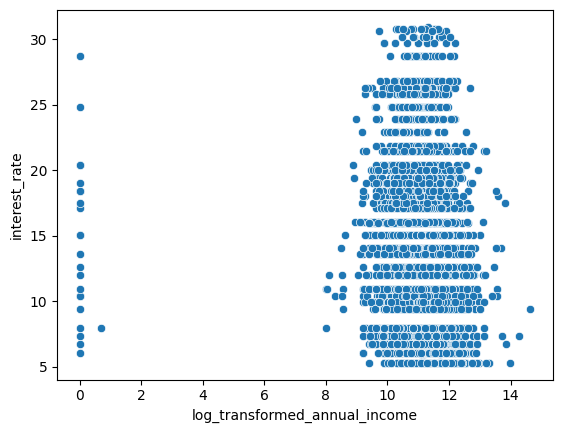

In [33]:
sns.scatterplot(temp_df, x = 'log_transformed_annual_income', y = 'interest_rate')

<Axes: xlabel='log_transformed_debit_to_income', ylabel='interest_rate'>

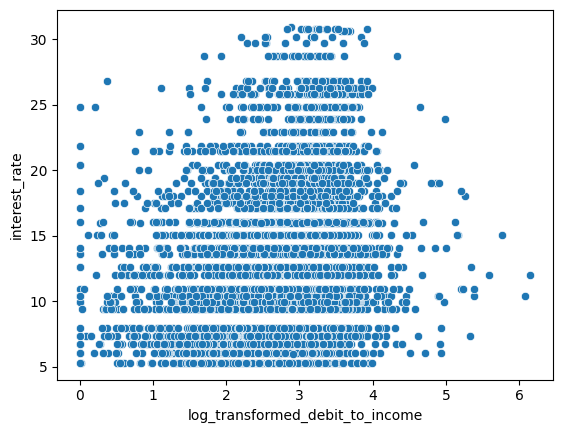

In [34]:
sns.scatterplot(temp_df, x = 'log_transformed_debit_to_income', y = 'interest_rate')

In [35]:
borrower_profile_df = temp_df

## EDA - Credit History

In [36]:
temp_df = credit_history_df.copy()

<Axes: >

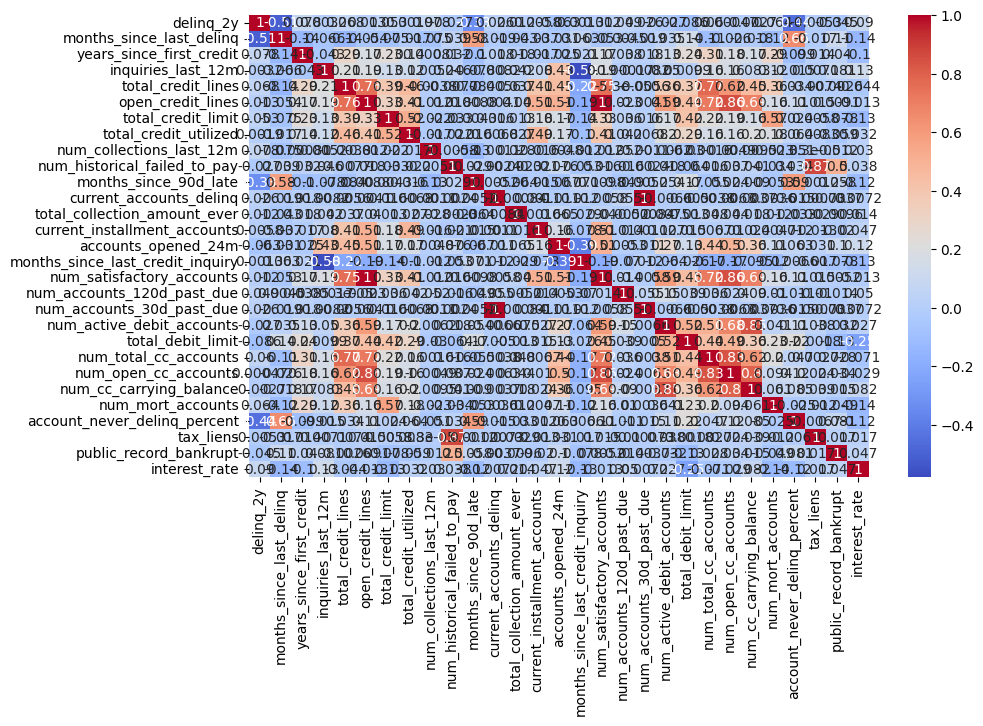

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(credit_history_df.corr(), cmap='coolwarm', annot=True)

In [38]:
temp_df.columns

Index(['delinq_2y', 'months_since_last_delinq', 'years_since_first_credit',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'interest_rate'],
      dtype='object')

<Axes: >

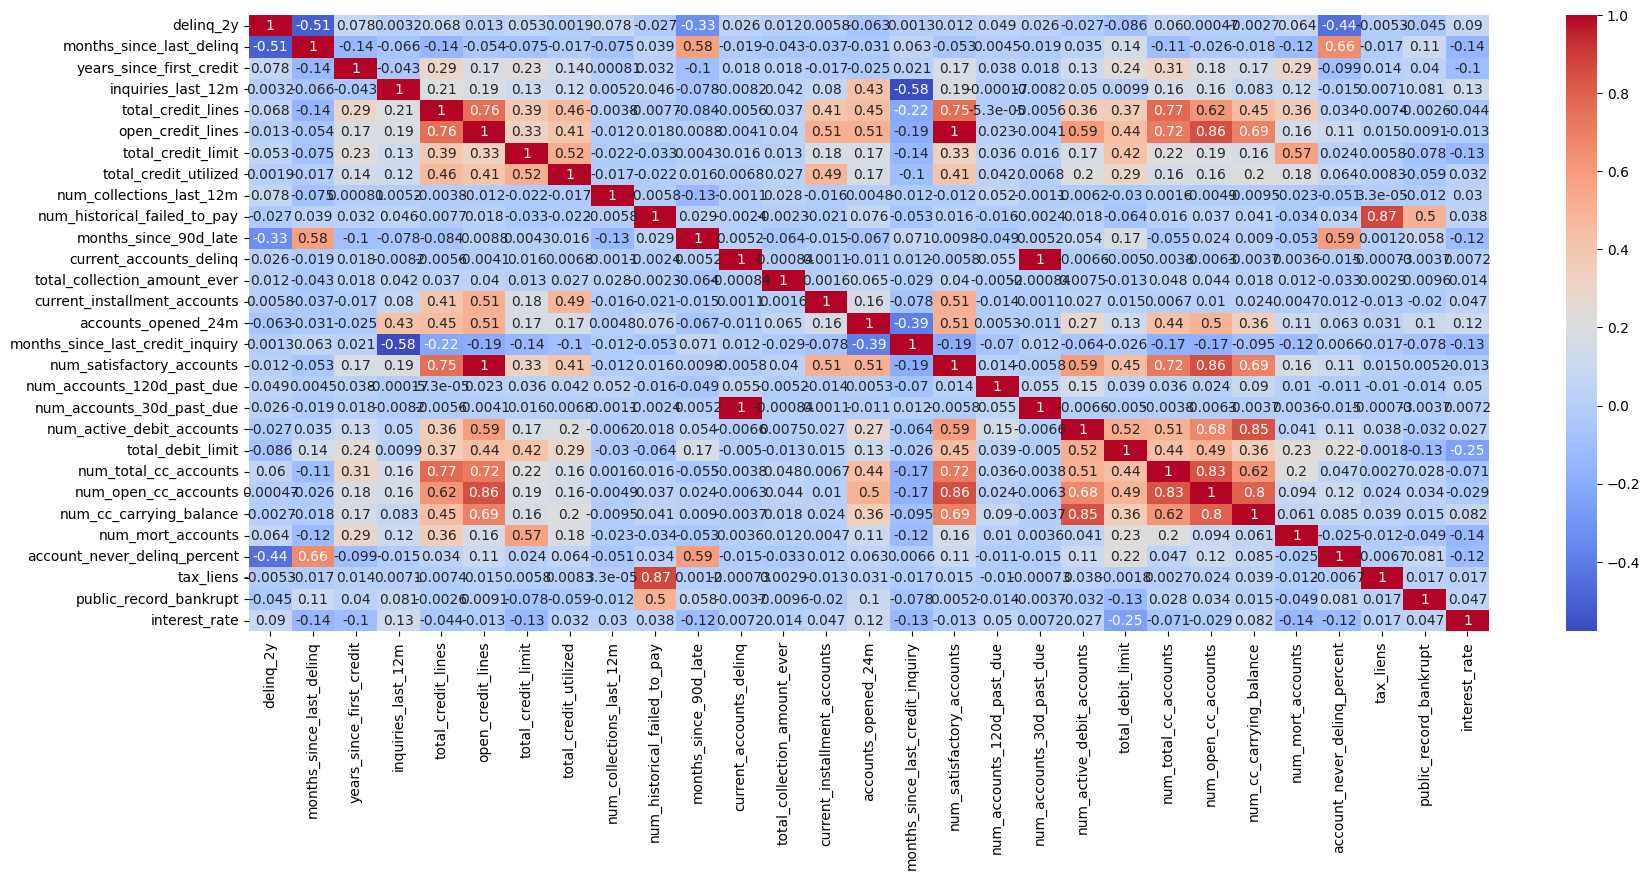

In [39]:
plt.figure(figsize=(20,8))
sns.heatmap(temp_df.corr(), cmap='coolwarm', annot=True)

In [40]:
# remove num_satisfactory_accounts --> heavily correlated to open_credit_lines
# remove current_accounts_delinq --> heavily correlated with num_accounts_30d_past_due

temp_df.drop(columns = ['num_satisfactory_accounts', 'current_accounts_delinq'], inplace=True)

In [41]:
# remove total_credit_lines --> heavily correlated with open_credit_lines
# remove num_total_cc_accounts --> heavily correlated with open_credit_lines
# remove num_open_cc_accounts --> correlated with open_credit_lines
# remove num_cc_carrying_balance --> correlated with num_open_cc_accounts 

temp_df.drop(columns = ['total_credit_lines', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance'], inplace = True)

In [42]:
# drop tax_liens as correlation with num_historical_failed_to_pay is high and num_historical_fail_to_pay has higher correlation with interest_rate than tax_liens
temp_df.drop(columns = 'tax_liens', inplace=True)

<Axes: >

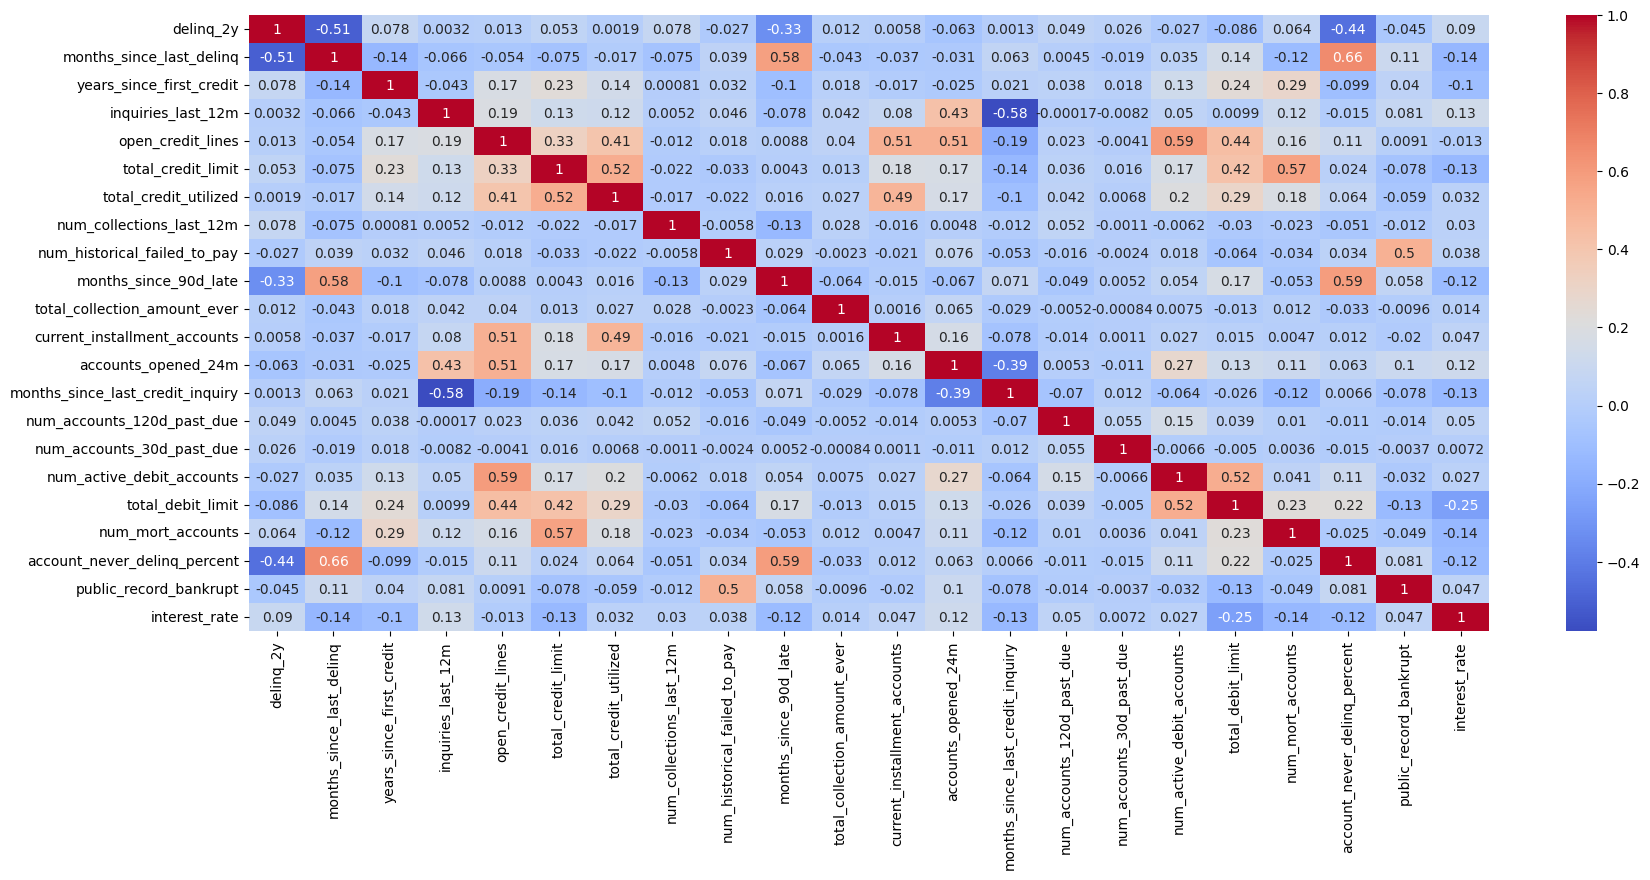

In [43]:
plt.figure(figsize=(20,8))
sns.heatmap(temp_df.corr(), cmap='coolwarm', annot=True)

In [44]:
len(temp_df.columns)

22

In [45]:
# create buckets of features for deeper EDA

delinq_features = ['delinq_2y', 'months_since_last_delinq', 'num_historical_failed_to_pay', 'months_since_90d_late', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'account_never_delinq_percent', 'interest_rate']

credit_activity = ['years_since_first_credit', 'inquiries_last_12m', 'open_credit_lines', 'total_credit_utilized', 'months_since_last_credit_inquiry', 'interest_rate']

limit_utilisation = ['total_debit_limit', 'total_credit_limit', 'interest_rate']

account_composition = ['current_installment_accounts', 'accounts_opened_24m', 'num_active_debit_accounts', 'num_mort_accounts', 'interest_rate']

public_records = ['num_collections_last_12m', 'total_collection_amount_ever', 'public_record_bankrupt', 'interest_rate']


Analysing Delinq features

In [46]:
temp_df

,delinq_2y,months_since_last_delinq,years_since_first_credit,inquiries_last_12m,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,interest_rate
0,0,38.0,24,6,10,70795,38767,0,0,38.0,1250,2,5,5.0,0.0,0,2,11100,1,92.9,0,14.07
1,0,119.0,29,1,14,28800,4321,0,1,129.0,0,0,11,8.0,0.0,0,3,16500,0,100.0,1,12.61
2,0,28.0,19,4,10,24193,16000,0,0,28.0,432,1,13,7.0,0.0,0,3,4300,0,93.5,0,17.09
3,0,119.0,18,0,4,25400,4997,0,1,129.0,0,1,1,15.0,0.0,0,2,19400,0,100.0,0,6.72
4,0,119.0,17,7,16,69839,52722,0,0,129.0,0,1,6,4.0,0.0,0,10,32700,0,100.0,0,14.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,119.0,17,5,13,199195,77963,0,1,129.0,0,3,8,6.0,0.0,0,4,44600,1,100.0,1,7.35
9996,4,9.0,31,1,15,382061,101571,0,0,9.0,0,3,0,1.0,0.0,0,5,28200,2,82.1,0,19.03
9997,2,6.0,21,0,11,346402,95421,0,0,129.0,0,3,4,16.0,0.0,0,5,14900,2,72.2,0,23.88
9998,0,119.0,26,1,15,294475,27641,0,0,129.0,0,2,2,5.0,0.0,0,1,46000,6,100.0,0,5.32


<Axes: >

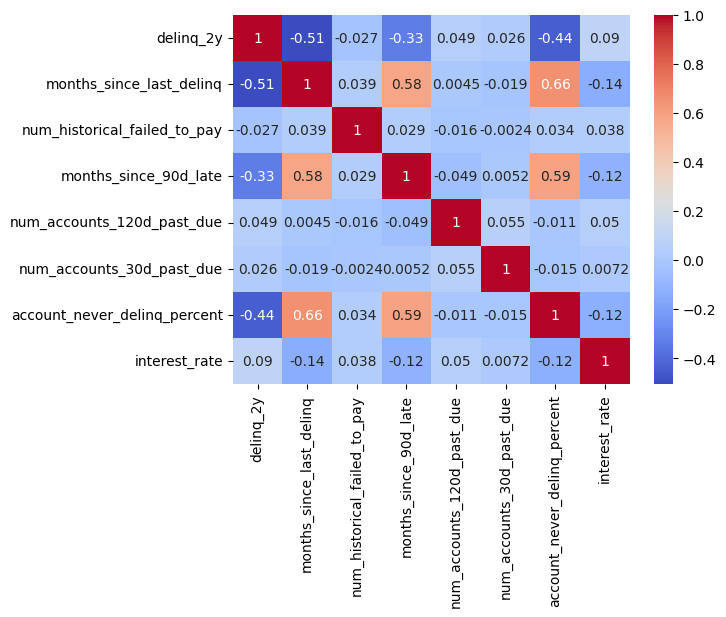

In [47]:
sns.heatmap(temp_df[delinq_features].corr(), cmap='coolwarm', annot=True)

In [48]:
# only keep the features with corr of higher than 1 with interest rate in delinq_features
temp_df.drop(columns = ['delinq_2y', 'num_historical_failed_to_pay', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due'], inplace = True)

<Axes: xlabel='months_since_last_delinq', ylabel='Count'>

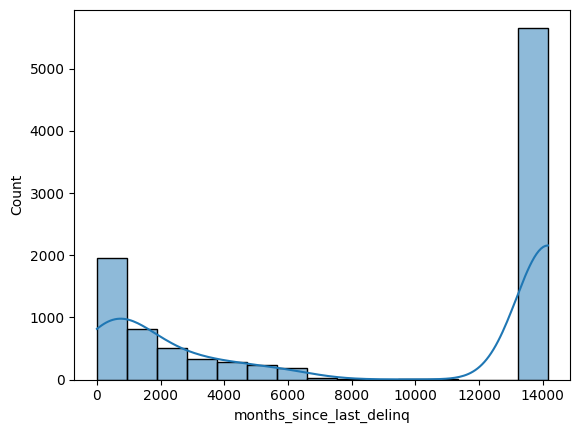

In [49]:
sns.histplot(temp_df['months_since_last_delinq']**2, kde=True)

In [50]:
temp_df['square_months_since_last_delinq'] = temp_df['months_since_last_delinq']**2

<Axes: xlabel='months_since_90d_late', ylabel='Count'>

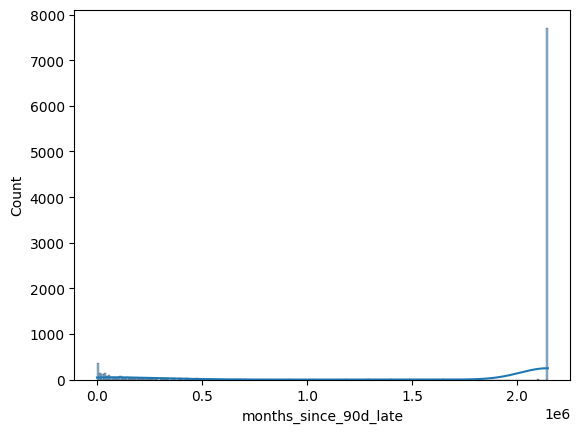

In [51]:
sns.histplot(temp_df['months_since_90d_late']**3, kde=True)

In [52]:
temp_df['months_since_90d_late'].describe()

count    10000.000000
mean       110.060200
std         36.322402
min          2.000000
25%        129.000000
50%        129.000000
75%        129.000000
max        129.000000
Name: months_since_90d_late, dtype: float64

In [53]:
# month_since_90d_late == 129 (max), create a new column 'never_late'
temp_df['never_late_payment'] = (temp_df['months_since_90d_late'] == 129).astype(int)

In [54]:
# temp_df.loc[temp_df['never_late_payment'] == 1, 'months_since_90d_late'] = np.nan

<Axes: xlabel='months_since_90d_late', ylabel='Count'>

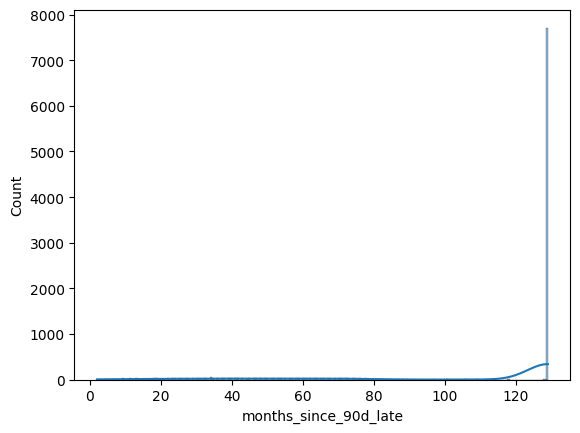

In [55]:
sns.histplot(temp_df['months_since_90d_late'], kde=True)

In [56]:
temp_df['never_late_payment'].value_counts()

never_late_payment
1    7715
0    2285
Name: count, dtype: int64

<Axes: xlabel='never_late_payment', ylabel='interest_rate'>

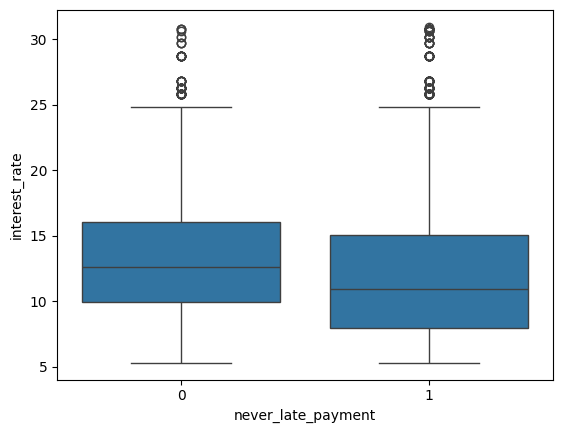

In [57]:
sns.boxplot(x= temp_df['never_late_payment'], y = temp_df['interest_rate'])

In [58]:
np.max(temp_df['months_since_90d_late'])

np.float64(129.0)

<Axes: xlabel='account_never_delinq_percent', ylabel='Count'>

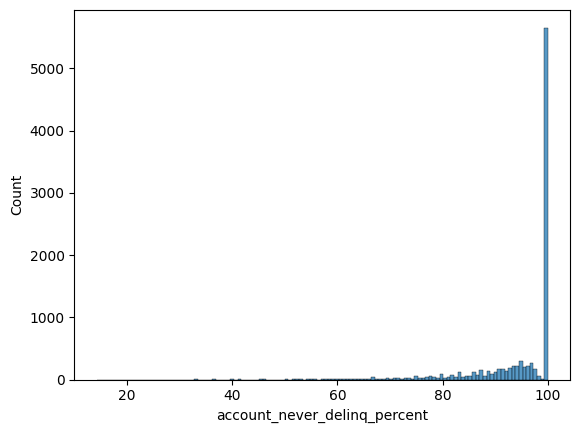

In [59]:
sns.histplot(temp_df['account_never_delinq_percent'])

In [60]:
# temp_df['delinq_risk_category']
temp_df['delinq_risk_category'] = pd.cut(temp_df['account_never_delinq_percent'], bins = [-1, 80, 95, 99, 100], labels= ['High Risk', 'Moderate Risk', 'Low Risk', 'Perfect'])

<Axes: xlabel='delinq_risk_category', ylabel='interest_rate'>

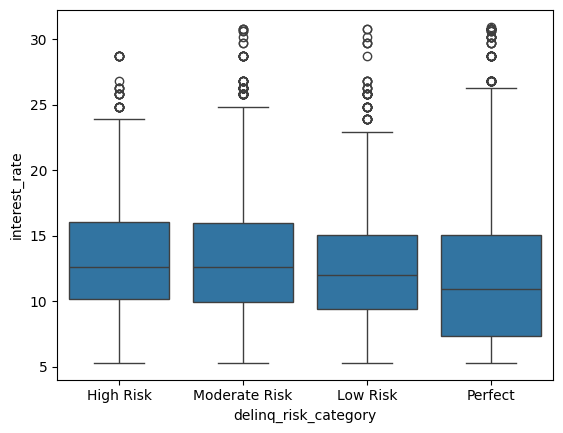

In [61]:
sns.boxplot(x = temp_df['delinq_risk_category'], y= temp_df['interest_rate'])

Analysing Credit activity features

In [62]:
credit_activity = ['years_since_first_credit', 'inquiries_last_12m', 'open_credit_lines', 'total_credit_utilized', 'months_since_last_credit_inquiry', 'interest_rate']

In [63]:
temp_df[credit_activity].corr()

,years_since_first_credit,inquiries_last_12m,open_credit_lines,total_credit_utilized,months_since_last_credit_inquiry,interest_rate
years_since_first_credit,1.000000,-0.042745,0.174322,0.140936,0.020712,-0.103635
inquiries_last_12m,-0.042745,1.000000,0.186462,0.120593,-0.578027,0.131193
open_credit_lines,0.174322,0.186462,1.000000,0.406047,-0.192809,-0.012773
total_credit_utilized,0.140936,0.120593,0.406047,1.000000,-0.100377,0.031527
months_since_last_credit_inquiry,0.020712,-0.578027,-0.192809,-0.100377,1.000000,-0.133645
interest_rate,-0.103635,0.131193,-0.012773,0.031527,-0.133645,1.000000


<Axes: >

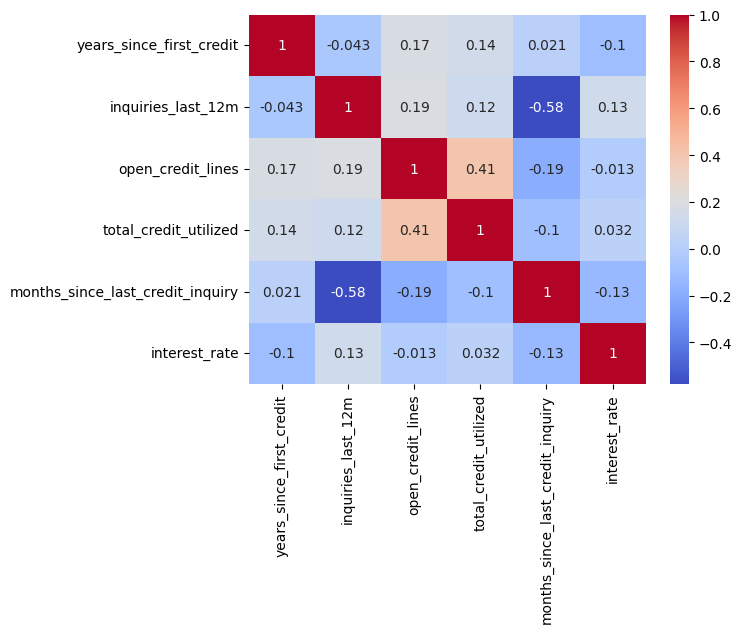

In [64]:
sns.heatmap(temp_df[credit_activity].corr(), cmap= 'coolwarm', annot=True)

In [65]:
temp_df.drop(columns = ['years_since_first_credit', 'open_credit_lines', 'total_credit_utilized', 'months_since_last_credit_inquiry'], inplace = True)

<Axes: xlabel='inquiries_last_12m', ylabel='interest_rate'>

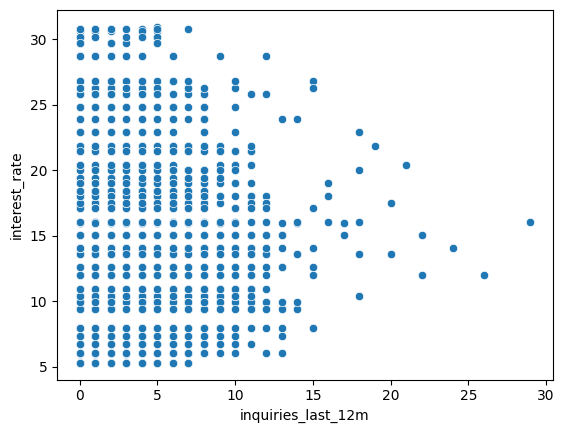

In [66]:
sns.scatterplot(x = (temp_df['inquiries_last_12m']), y = temp_df['interest_rate'])

Limit_utilisation feature analysis

In [67]:
limit_utilisation = ['total_debit_limit', 'total_credit_limit', 'interest_rate']


<Axes: >

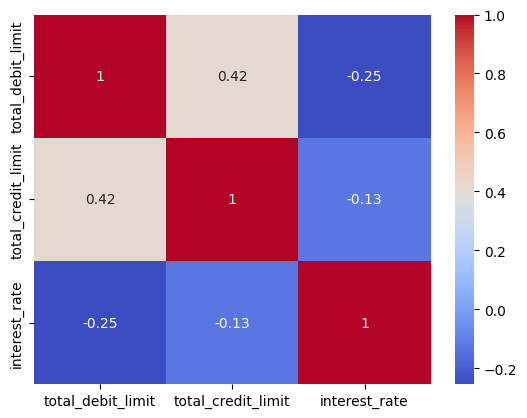

In [68]:
sns.heatmap(temp_df[limit_utilisation].corr(), cmap='coolwarm', annot=True)

In [69]:
# drop total_credit_limit
temp_df.drop(columns = 'total_credit_limit', inplace=True)

<Axes: xlabel='total_debit_limit', ylabel='Count'>

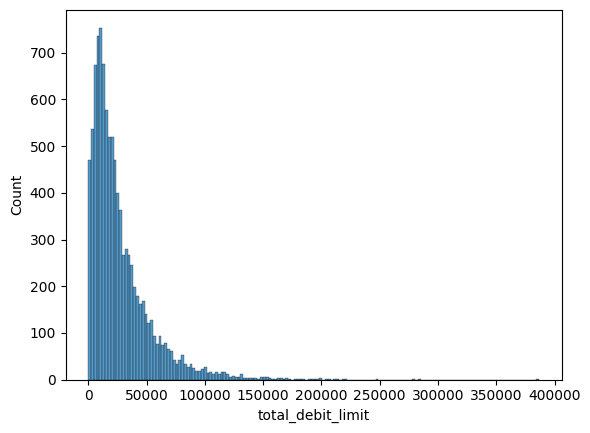

In [70]:
sns.histplot(temp_df['total_debit_limit'])

<Axes: xlabel='total_debit_limit', ylabel='Count'>

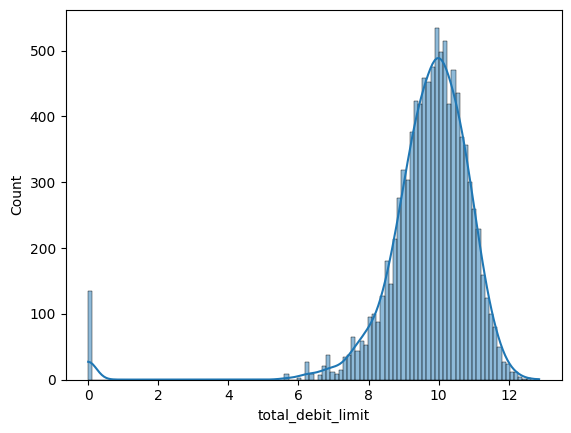

In [71]:
sns.histplot(np.log1p(temp_df['total_debit_limit']), kde = True)

In [72]:
# temp_index = temp_df[temp_df['total_debit_limit'] > temp_df['total_debit_limit'].quantile(0.99)]

In [73]:
# temp_df.drop(index = temp_index.index, inplace =True)

<Axes: xlabel='total_debit_limit', ylabel='Count'>

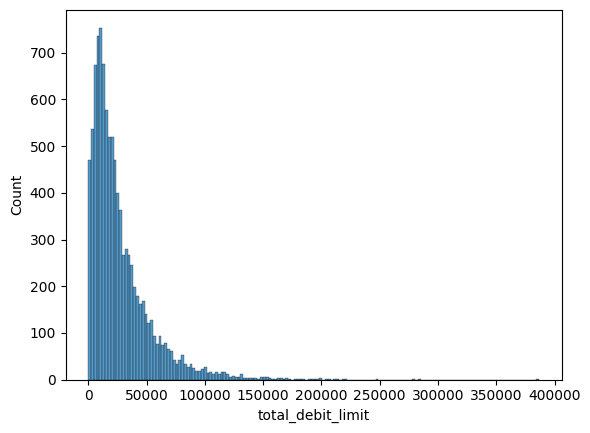

In [74]:
sns.histplot(temp_df['total_debit_limit'])

<Axes: xlabel='total_debit_limit', ylabel='Count'>

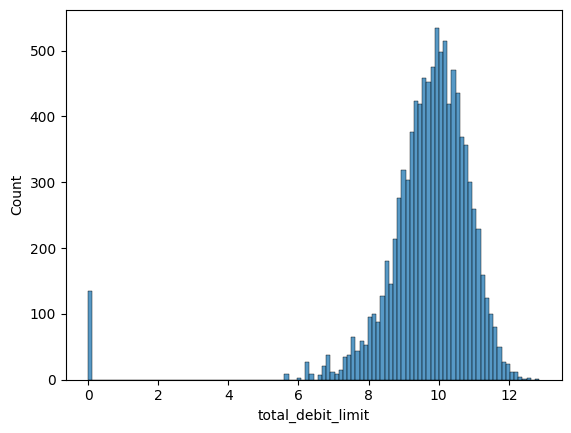

In [75]:
sns.histplot(np.log1p(temp_df['total_debit_limit']))

<Axes: xlabel='total_debit_limit', ylabel='interest_rate'>

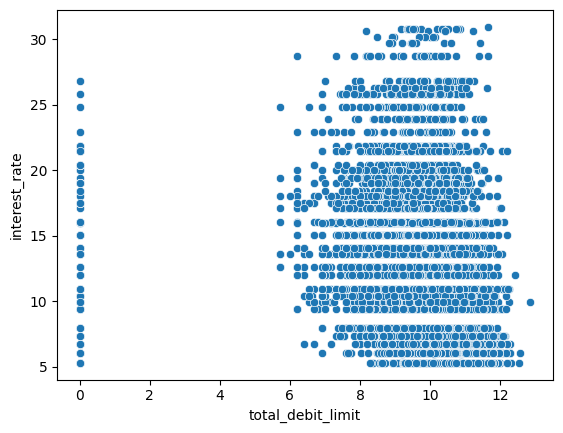

In [76]:
sns.scatterplot(x = np.log1p(temp_df['total_debit_limit']), y = temp_df['interest_rate'])

<Axes: xlabel='total_debit_limit', ylabel='interest_rate'>

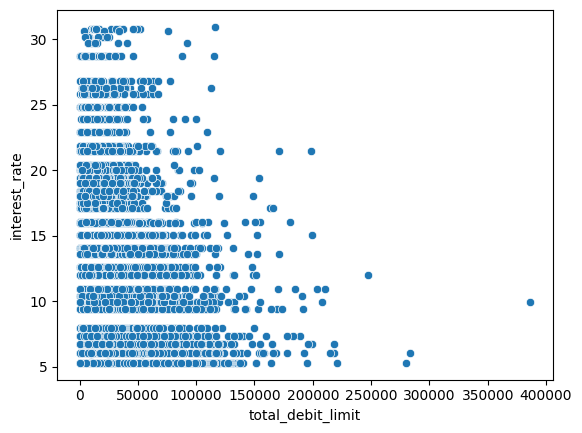

In [77]:
sns.scatterplot(x = temp_df['total_debit_limit'], y = temp_df['interest_rate'])

<Axes: xlabel='total_debit_limit', ylabel='interest_rate'>

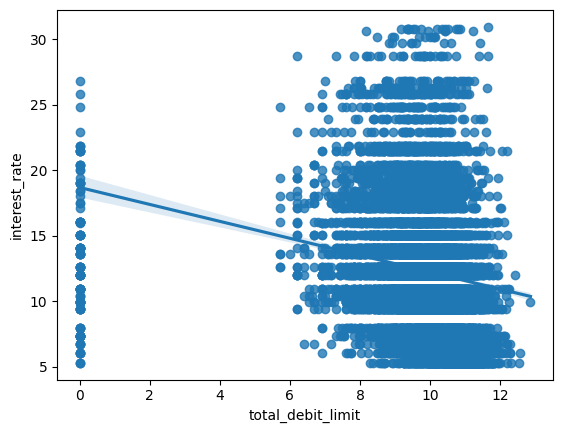

In [78]:
sns.regplot(x=np.log1p(temp_df['total_debit_limit']), y=temp_df["interest_rate"])

In [79]:
temp_df['log_total_debit_limit'] = np.log1p(temp_df['total_debit_limit'])

Account composition feature analysis

In [80]:
account_composition = ['current_installment_accounts', 'accounts_opened_24m', 'num_active_debit_accounts', 'num_mort_accounts', 'interest_rate']

In [81]:
temp_df[account_composition]

,current_installment_accounts,accounts_opened_24m,num_active_debit_accounts,num_mort_accounts,interest_rate
0,2,5,2,1,14.07
1,0,11,3,0,12.61
2,1,13,3,0,17.09
3,1,1,2,0,6.72
4,1,6,10,0,14.07
...,...,...,...,...,...
9995,3,8,4,1,7.35
9996,3,0,5,2,19.03
9997,3,4,5,2,23.88
9998,2,2,1,6,5.32


In [82]:
temp_df[account_composition].corr()

,current_installment_accounts,accounts_opened_24m,num_active_debit_accounts,num_mort_accounts,interest_rate
current_installment_accounts,1.000000,0.157638,0.026708,0.004717,0.047131
accounts_opened_24m,0.157638,1.000000,0.272818,0.106556,0.120657
num_active_debit_accounts,0.026708,0.272818,1.000000,0.040865,0.026800
num_mort_accounts,0.004717,0.106556,0.040865,1.000000,-0.138351
interest_rate,0.047131,0.120657,0.026800,-0.138351,1.000000


<Axes: >

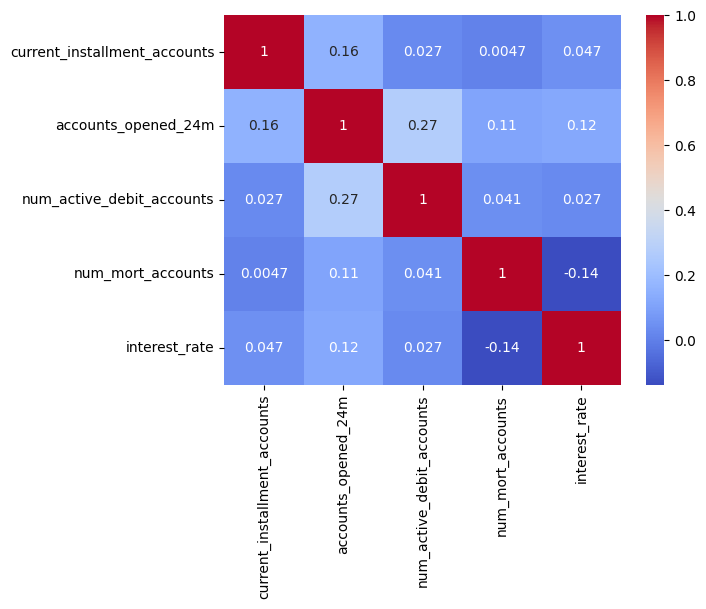

In [83]:
sns.heatmap(temp_df[account_composition].corr(), cmap='coolwarm', annot= True)

In [84]:
# drop current_install_ment_accounts
temp_df.drop(columns = 'current_installment_accounts', inplace = True)

<Axes: xlabel='accounts_opened_24m', ylabel='interest_rate'>

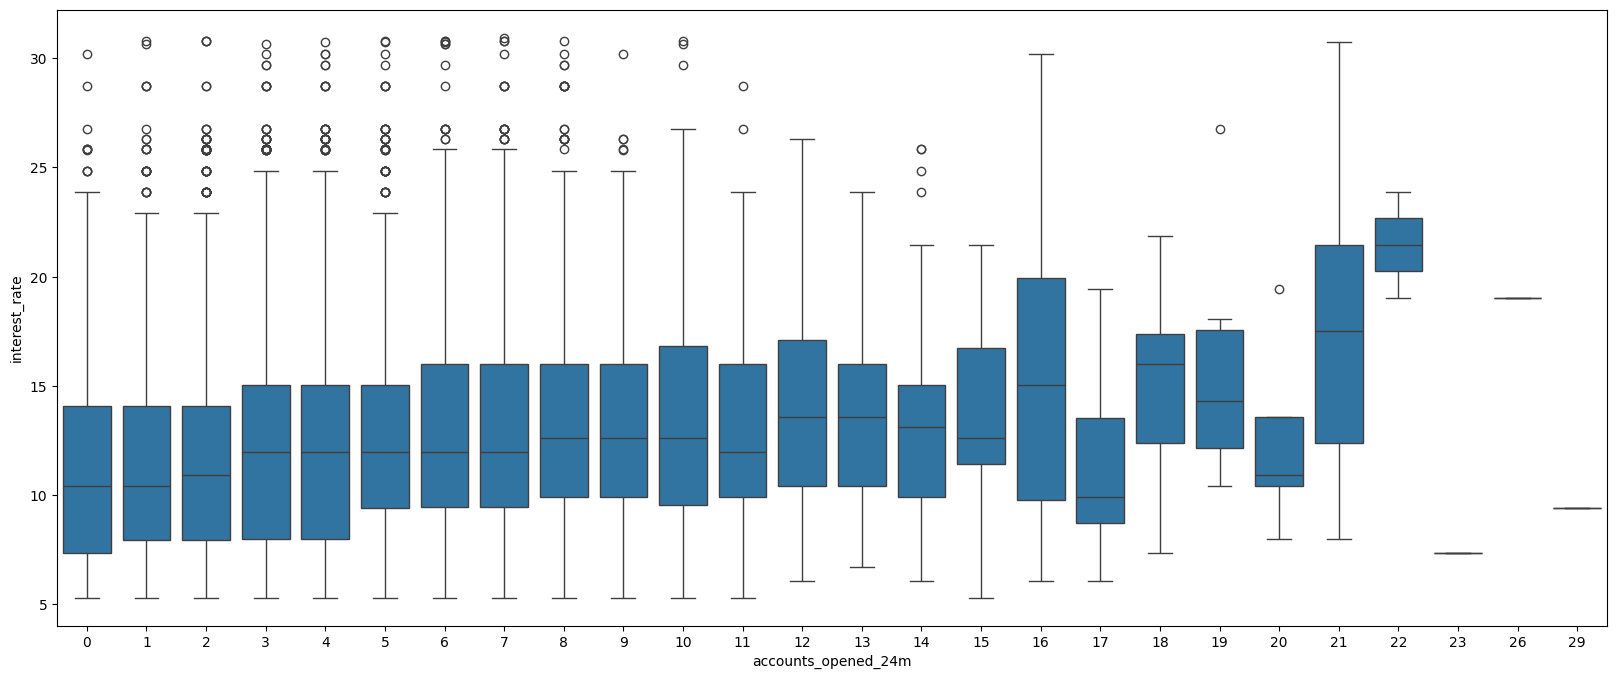

In [85]:
plt.figure(figsize=(20,8))
sns.boxplot(x = temp_df['accounts_opened_24m'], y = temp_df['interest_rate'])

<Axes: xlabel='num_active_debit_accounts', ylabel='interest_rate'>

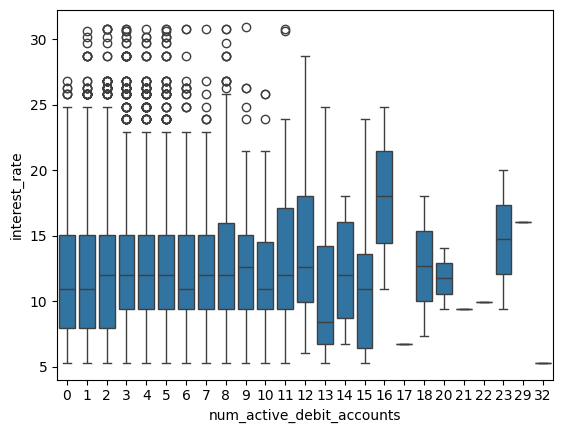

In [86]:
sns.boxplot(x = temp_df['num_active_debit_accounts'], y = temp_df['interest_rate'])

<Axes: xlabel='num_active_debit_accounts', ylabel='Count'>

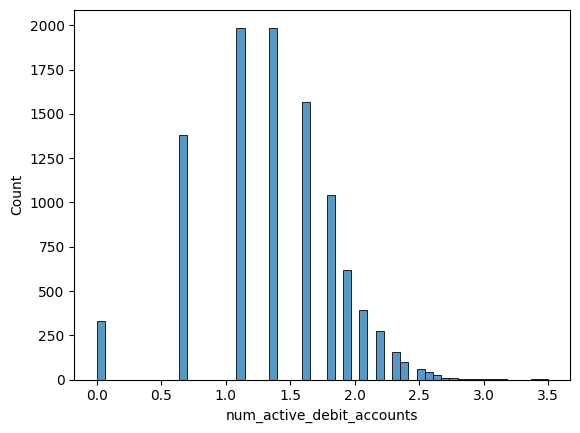

In [87]:
sns.histplot(np.log1p(temp_df['num_active_debit_accounts']))

In [88]:
temp_df['log_num_active_debit_accounts'] = np.log1p(temp_df['num_active_debit_accounts'])

<Axes: xlabel='log_num_active_debit_accounts', ylabel='interest_rate'>

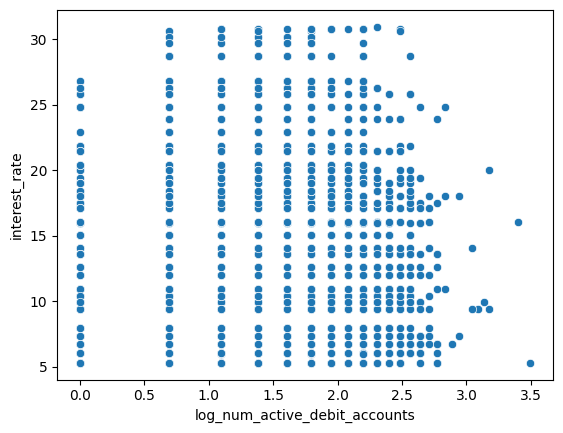

In [89]:
sns.scatterplot(x = temp_df['log_num_active_debit_accounts'], y = temp_df['interest_rate'])

<Axes: xlabel='num_mort_accounts', ylabel='interest_rate'>

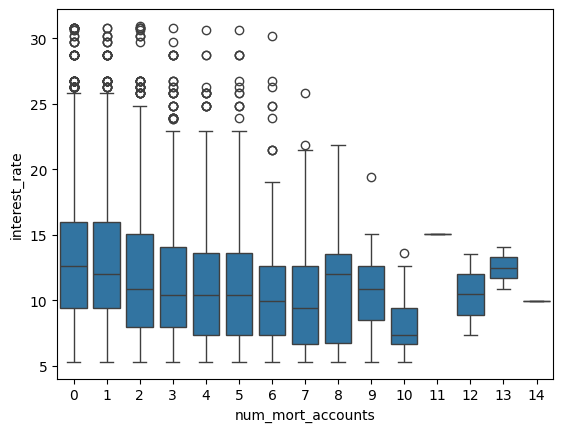

In [90]:
sns.boxplot(x = temp_df['num_mort_accounts'], y = temp_df['interest_rate'])

Public record features analysis

In [91]:
public_records = ['num_collections_last_12m', 'total_collection_amount_ever', 'public_record_bankrupt', 'interest_rate']


In [92]:
temp_df[public_records].corr()

,num_collections_last_12m,total_collection_amount_ever,public_record_bankrupt,interest_rate
num_collections_last_12m,1.000000,0.027804,-0.011918,0.029901
total_collection_amount_ever,0.027804,1.000000,-0.009645,0.013532
public_record_bankrupt,-0.011918,-0.009645,1.000000,0.047477
interest_rate,0.029901,0.013532,0.047477,1.000000


<Axes: >

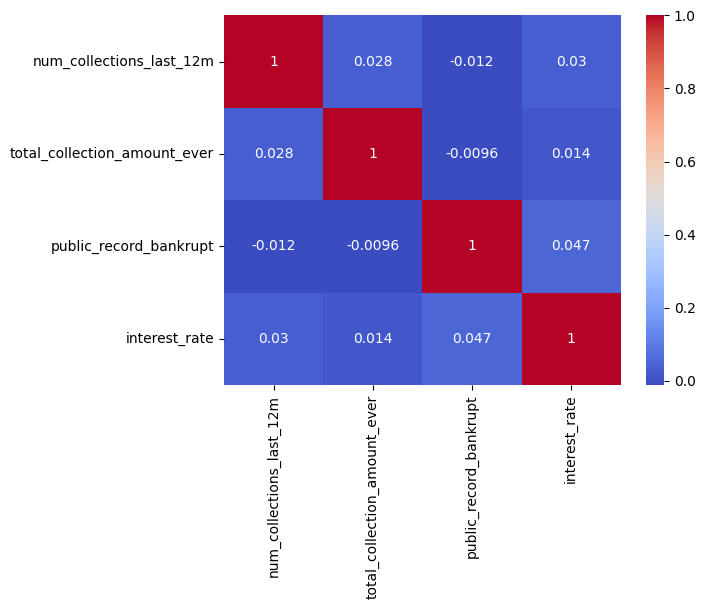

In [93]:
sns.heatmap(temp_df[public_records].corr(), cmap='coolwarm', annot=True)

In [94]:
temp_df['num_collections_last_12m'].value_counts()

num_collections_last_12m
0    9873
1     117
2       9
3       1
Name: count, dtype: int64

<Axes: xlabel='num_collections_last_12m', ylabel='interest_rate'>

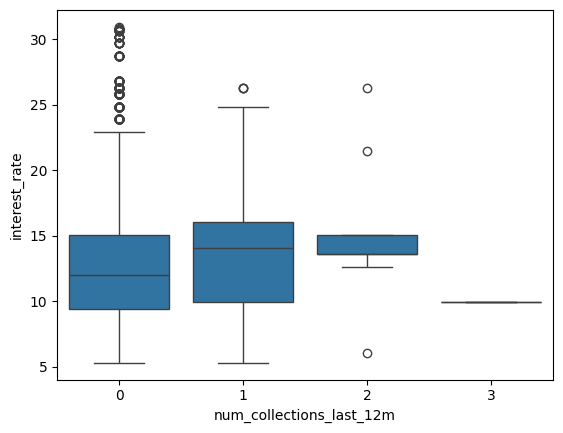

In [95]:
sns.boxplot(x = temp_df['num_collections_last_12m'], y = temp_df['interest_rate'])

In [96]:
temp_df.drop(columns = 'num_collections_last_12m', inplace = True)

In [97]:
temp_df['total_collection_amount_ever'].value_counts()

total_collection_amount_ever
0       8635
100       12
50        10
150        9
96         9
        ... 
4562       1
3191       1
968        1
144        1
1323       1
Name: count, Length: 896, dtype: int64

In [98]:
temp_df.drop(columns = 'total_collection_amount_ever', inplace = True)

<Axes: xlabel='public_record_bankrupt', ylabel='interest_rate'>

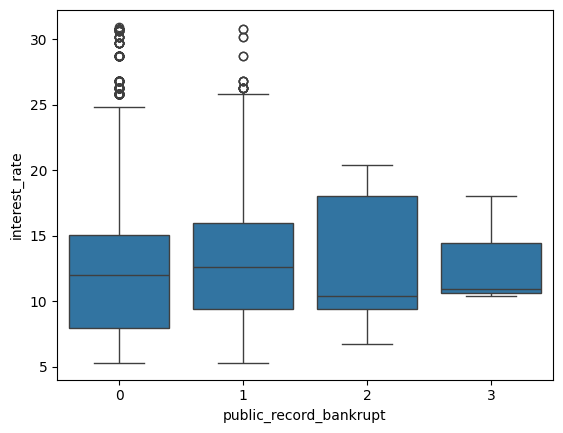

In [99]:
sns.boxplot(x = temp_df['public_record_bankrupt'], y = temp_df['interest_rate'])

In [100]:
temp_df['public_record_bankrupt'].value_counts()

public_record_bankrupt
0    8785
1    1195
2      17
3       3
Name: count, dtype: int64

In [101]:
temp_df['has_bankruptcy'] = (temp_df['public_record_bankrupt'] > 0).astype(int)

<Axes: xlabel='has_bankruptcy', ylabel='interest_rate'>

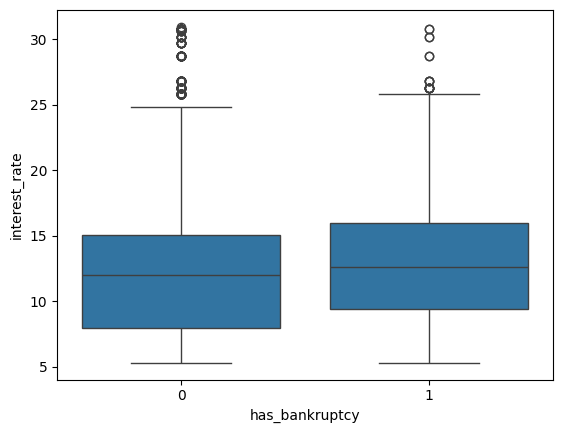

In [102]:
sns.boxplot(x = temp_df['has_bankruptcy'], y = temp_df['interest_rate'])

In [103]:
temp_df.to_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/preprocessing_stage_2.csv')

In [104]:
credit_history_df = temp_df

## EDA - loan_details

In [105]:
loan_details_df = df[['loan_purpose', 'application_type', 'loan_amount', 'term', 'installment', 'grade', 'sub_grade', 'issue_month', 'initial_listing_status', 'disbursement_method','interest_rate']]

In [106]:
temp_df = loan_details_df.copy()

In [107]:
temp_df.head()

,loan_purpose,application_type,loan_amount,term,installment,grade,sub_grade,issue_month,initial_listing_status,disbursement_method,interest_rate
0,moving,individual,28000,60,652.53,C,C3,Mar-2018,whole,Cash,14.07
1,debt_consolidation,individual,5000,36,167.54,C,C1,Feb-2018,whole,Cash,12.61
2,other,individual,2000,36,71.40,D,D1,Feb-2018,fractional,Cash,17.09
3,debt_consolidation,individual,21600,36,664.19,A,A3,Jan-2018,whole,Cash,6.72
4,credit_card,joint,23000,36,786.87,C,C3,Mar-2018,whole,Cash,14.07


Categorical columns

In [108]:
temp_df['loan_purpose'].value_counts()

loan_purpose
debt_consolidation    5144
credit_card           2249
other                  914
home_improvement       680
major_purchase         303
medical                162
house                  151
car                    131
small_business         125
moving                  69
vacation                62
renewable_energy        10
Name: count, dtype: int64

<Axes: xlabel='loan_purpose', ylabel='interest_rate'>

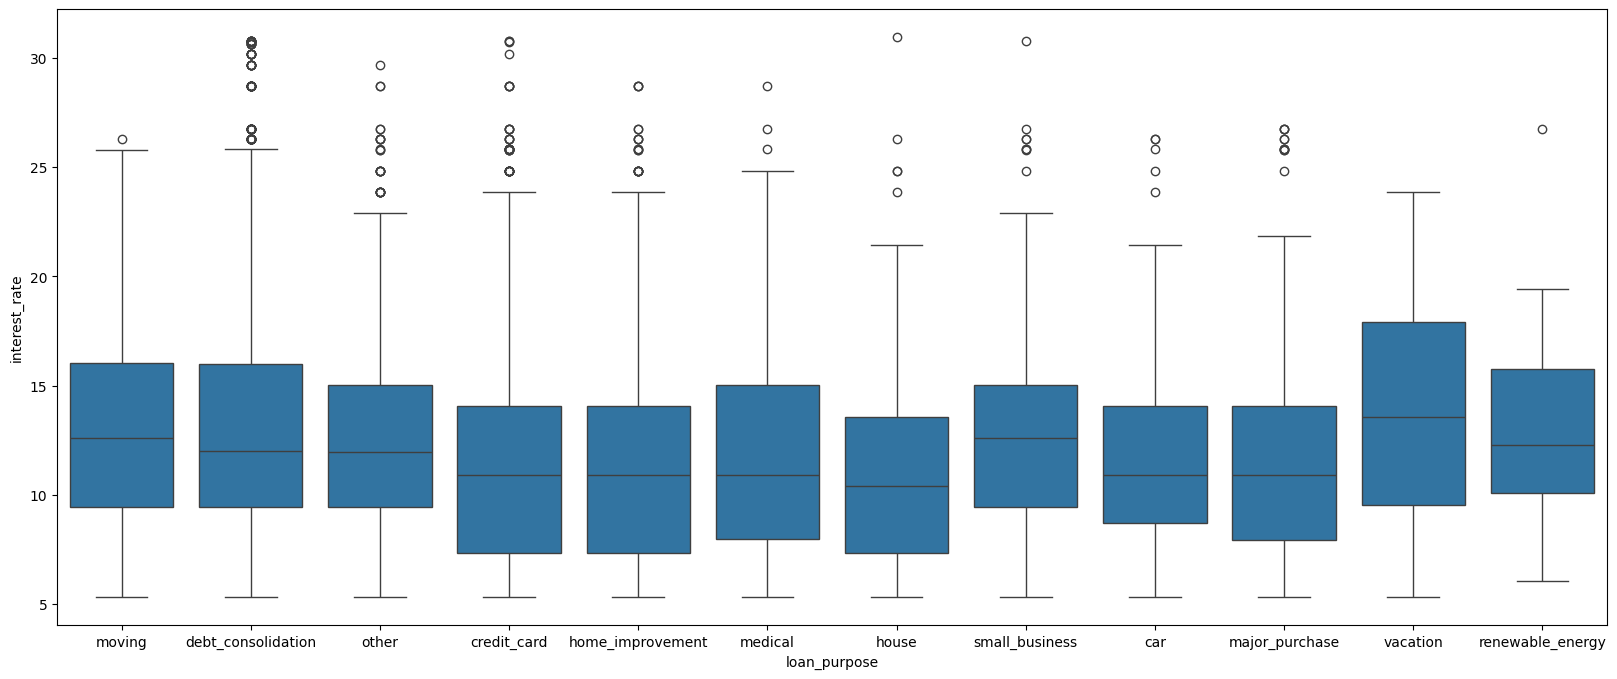

In [109]:
plt.figure(figsize=(20, 8))
sns.boxplot(x = temp_df['loan_purpose'], y = temp_df['interest_rate'])

In [110]:
rare_purpose = ['medical', 'house', 'car', 'small_business', 'moving', 'vacation', 'renewable_energy']
temp_df['loan_purpose'] = temp_df['loan_purpose'].apply(lambda x: x if x not in rare_purpose else 'other')

<Axes: xlabel='loan_purpose', ylabel='interest_rate'>

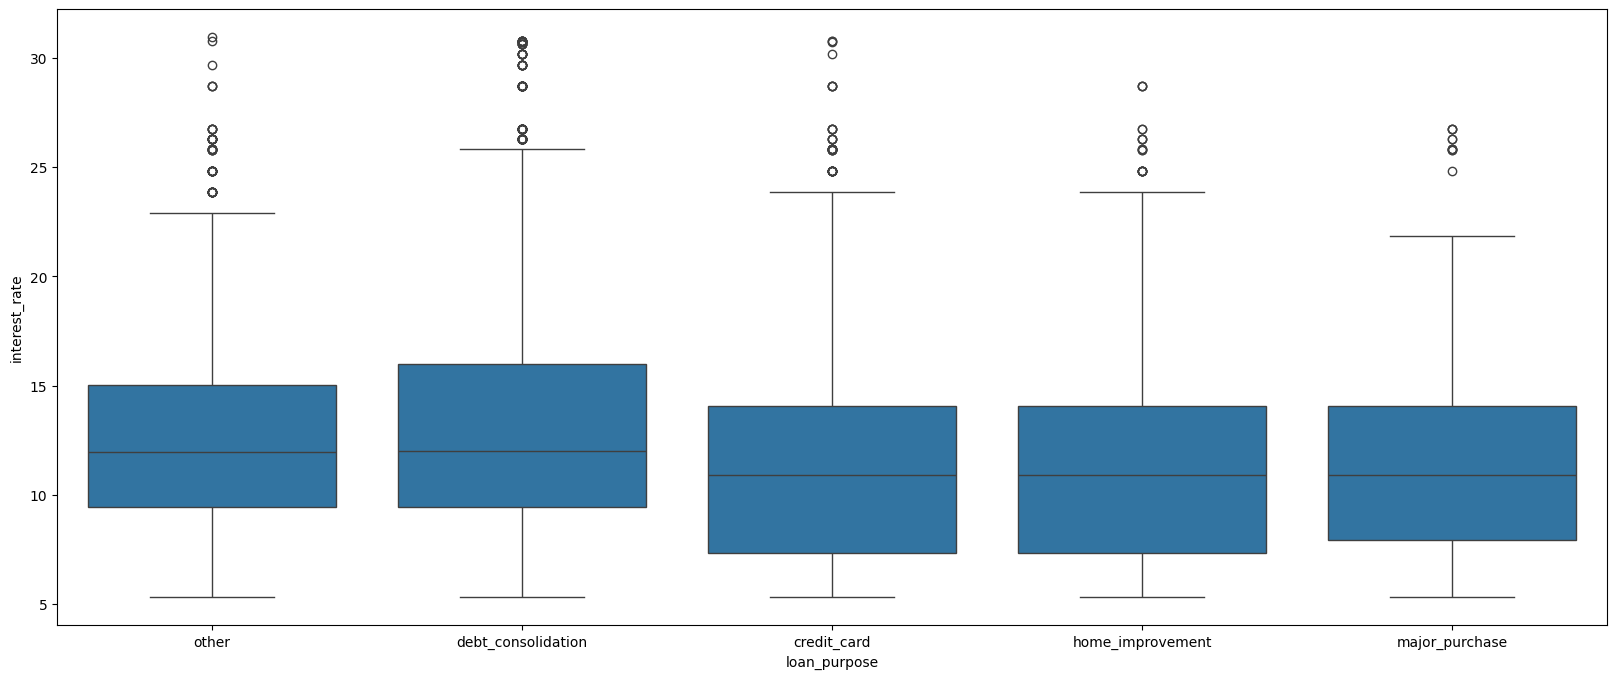

In [111]:
plt.figure(figsize=(20, 8))
sns.boxplot(x = temp_df['loan_purpose'], y = temp_df['interest_rate'])

<Axes: xlabel='application_type', ylabel='interest_rate'>

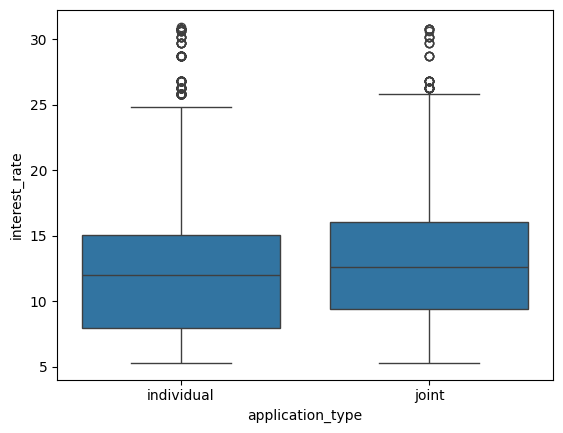

In [112]:
sns.boxplot(x = temp_df['application_type'], y = temp_df['interest_rate'])


numeric columns

In [113]:
temp_df1 = temp_df[['loan_amount', 'term', 'installment', 'interest_rate']]

<Axes: >

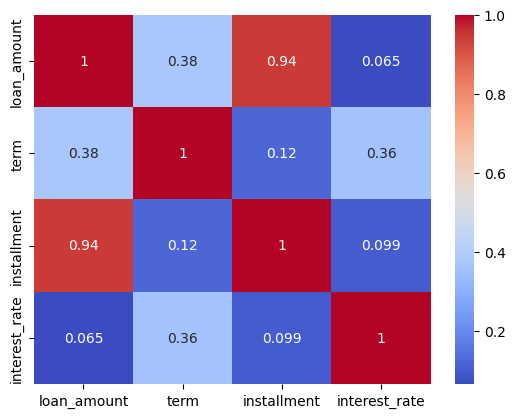

In [114]:
sns.heatmap(temp_df1.corr(), cmap = 'coolwarm', annot= True)

In [115]:
temp_df.drop(columns = 'term', inplace= True)

In [116]:
temp_df

,loan_purpose,application_type,loan_amount,installment,grade,sub_grade,issue_month,initial_listing_status,disbursement_method,interest_rate
0,other,individual,28000,652.53,C,C3,Mar-2018,whole,Cash,14.07
1,debt_consolidation,individual,5000,167.54,C,C1,Feb-2018,whole,Cash,12.61
2,other,individual,2000,71.40,D,D1,Feb-2018,fractional,Cash,17.09
3,debt_consolidation,individual,21600,664.19,A,A3,Jan-2018,whole,Cash,6.72
4,credit_card,joint,23000,786.87,C,C3,Mar-2018,whole,Cash,14.07
...,...,...,...,...,...,...,...,...,...,...
9995,other,individual,24000,744.90,A,A4,Jan-2018,whole,Cash,7.35
9996,debt_consolidation,individual,10000,366.72,D,D3,Feb-2018,whole,Cash,19.03
9997,debt_consolidation,joint,30000,1175.10,E,E2,Feb-2018,fractional,Cash,23.88
9998,other,individual,24000,722.76,A,A1,Feb-2018,whole,Cash,5.32


In [117]:
temp_df.drop(columns = ['grade', 'sub_grade', 'issue_month', 'initial_listing_status', 'disbursement_method'], inplace = True)

In [119]:
# ['total_debit_limit'] > quantile(0.99) to be removed in the end 


In [123]:
loan_details_df = temp_df

## Merging all the 3 datasets

In [128]:
df_final = pd.concat(
    [borrower_profile_df, credit_history_df, loan_details_df],
    axis=1
)

In [ ]:
# droping rows where total_debit_limit is higher than 99th percentile of that column 
tem_df = df_final[df_final['total_debit_limit'] > df_final['total_debit_limit'].quantile(0.99)]

In [140]:
df_final.drop(index = tem_df.index, inplace = True)

In [141]:
df_final.to_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/preprocessing_stage_3.csv')